# Notes

**Focus on**:
- Quality of data
- Log your data and calls when using data scraping
- Creativity
- Visualization (explanatory figures), simple is better
- Be critical of your data collection and generating process
    - Bias
    - Missing data
        - Ignore
        - Collect new data
        - Remove or replace missing data
    - Internal and external validity
    - Data collection type (random, survey, big data, other)
- Less focus on the analytical section and more on the collection and presentation

### Reflect on the ethical aspect
- Do yourespectprivacy? 
- Can single individualsbeidentified? 
- What are the potential consequences?
- Are there ethical considerations?
    - With respect to individuals? 
    - With respectto firmsor organizations?
- Consider the GDPR:
    - Is it anonymous? 
    - Personal data or statistics?
    - Any change of re-identification?

### Project ideas

- Factor based investing (use google or yahoo finance API)
- Trump tweet correlation with stock market
- Don't use LinkedIn
- 


### Logging

- Log your calls, use it to determine success ratio
    - Where did the call fail? Rewrite code.
    - Don't be greedy. time.sleep(0.5) between each call.
- Visualize the log (lecture 10)

We start by importing our data source to Python. The file *tweets.json* is created from [the Trump twitter archive](http://www.trumptwitterarchive.com/archive). We have selected all tweets from the 20th of January 2017 (assumed office) to 21st of August 2019.

In [54]:
# Importing packages
import pandas as pd
import json, codecs
import scraping_class, time
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline


In [56]:
logfile = 'my_log'## name your log file.
connector = scraping_class.Connector(logfile)
data = []
# Fetching data
for i in range(2017,2020):
    url = 'http://www.trumptwitterarchive.com/data/realdonaldtrump/'+str(i)+'.json'
    r, call_id = connector.get(url, 'Tweets')
    json_file = r.json() 
    data += json_file[::-1] # invert list
    time.sleep(0.5) # set sleep timer to prevent unintentional DOS attacks


In [57]:
# Creating and manipulating dataframes
# Main dataframe
df = pd.DataFrame(data)
date = [i[2]+i[1]+i[-1]+'-'+i[3] for i in df['created_at'].str.split(' ')] # slice date
df['datetime'] = date
df['datetime'] = pd.to_datetime(df['datetime'], format='%d%b%Y-%H:%M:%S') # format datetime 
df = df.reset_index(drop=True).sort_values(by=['datetime']) # set index to date
df = df.query("is_retweet == False") # drop retweets

#Trade war dataframe
df_trade = df[(df['datetime'] > '2018-03-02')] # filter by relevant date

# Keyword dataframe
keywords = ['tariff','trade war','trade']
#keywords = ['china', 'tariff','mexico','europe','billions','trade-war','war','xi jinping'] # list of relevant keywords
df['keyword'] = df['text'].str.contains('(?i)|'.join(keywords)) # search for keywords while ignoring word case (upper/lower)
df_filter = df.query("keyword == True") # filter query to remove retweets and non relevant tweets

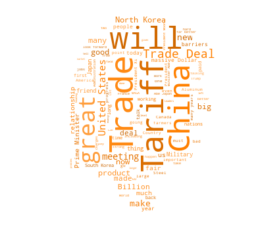

In [73]:
#WORDCLOUD

# function to get custom color for wordcloud
def custom_color(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = 30 # int(360.0 * 45.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(100, 160)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

trump_mask = np.array(Image.open("trump_mask.jpg")) # picture used as shape

# wordcloud for df_filter
text = " ".join(tweet for tweet in df_filter['text'][df_filter['text'].str.contains(r'^(?:(?!https|co|amp).)*$')])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",mask=trump_mask, 
                      contour_color ='black',color_func=custom_color).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")

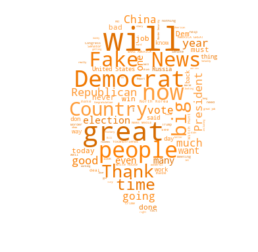

In [72]:
# wordcloud for df
text = " ".join(tweet for tweet in df['text'][df['text'].str.contains(r'^(?:(?!https|co|amp).)*$')])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",mask=trump_mask, 
                      contour_color ='black',color_func=custom_color).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud_all.png")